행정안전부,「지방자치단체외국인주민현황」, 2021, 2023.02.13, 시도별 외국인주민 현황\
https://kosis.kr/statHtml/statHtml.do?orgId=110&tblId=TX_11025_A000_A&conn_path=I2

In [3]:
# import
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import json
import folium
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [4]:
foreigner15 =pd.read_csv('../../Data/people/시도별 외국인주민 현황(2013~2014).csv', encoding='euc-kr')
foreigner21 =pd.read_csv('../../Data/people/시도별 외국인주민 현황(2015~2021).csv', encoding='euc-kr')

In [5]:
foreigner15.head()

,시점,성별(1),주민등록인구,주민등록인구.1,주민등록인구.2,주민등록인구.3,주민등록인구.4,주민등록인구.5,주민등록인구.6,주민등록인구.7,...,외국인주민자녀.58,외국인주민자녀.59,외국인주민자녀.60,외국인주민자녀.61,외국인주민자녀.62,외국인주민자녀.63,외국인주민자녀.64,외국인주민자녀.65,외국인주민자녀.66,외국인주민자녀.67
0,시점,성별(1),소계,소계,소계,소계,소계,소계,소계,소계,...,한국인 부모,한국인 부모,한국인 부모,한국인 부모,한국인 부모,한국인 부모,한국인 부모,한국인 부모,한국인 부모,한국인 부모
1,시점,성별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,...,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2,2013,합계,10195318,3538484,2505644,2843981,1469216,1524583,1147256,113117,...,46,3407,401,586,707,647,803,816,1071,196
3,2014,합계,10143645,3527635,2501588,2879782,1472910,1532811,1156480,122153,...,43,2949,380,534,704,573,769,755,926,180


In [6]:
foreigner21.head()

,시점,성별(1),한국국적을 가지지 않은 자 (명),한국국적을 가지지 않은 자 (명).1,한국국적을 가지지 않은 자 (명).2,한국국적을 가지지 않은 자 (명).3,한국국적을 가지지 않은 자 (명).4,한국국적을 가지지 않은 자 (명).5,한국국적을 가지지 않은 자 (명).6,한국국적을 가지지 않은 자 (명).7,...,외국인주민자녀(출생) (명).7,외국인주민자녀(출생) (명).8,외국인주민자녀(출생) (명).9,외국인주민자녀(출생) (명).10,외국인주민자녀(출생) (명).11,외국인주민자녀(출생) (명).12,외국인주민자녀(출생) (명).13,외국인주민자녀(출생) (명).14,외국인주민자녀(출생) (명).15,외국인주민자녀(출생) (명).16
0,시점,성별(1),소계,소계,소계,소계,소계,소계,소계,소계,...,소계,소계,소계,소계,소계,소계,소계,소계,소계,소계
1,시점,성별(1),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,...,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2,2015,합계,337116,44070,29282,67850,21592,19080,29860,4471,...,729,50313,6042,7089,10908,9744,11524,11775,14476,3051
3,2016,합계,335167,46168,30492,71873,23701,19687,28792,4835,...,794,49134,5884,7167,11177,9487,11332,11466,14034,3094
4,2017,합계,343927,48808,31365,79170,26052,20534,26601,5290,...,937,53152,6676,8132,12628,10993,12900,13437,16320,3525


In [7]:
foreigner21.tail()

,시점,성별(1),한국국적을 가지지 않은 자 (명),한국국적을 가지지 않은 자 (명).1,한국국적을 가지지 않은 자 (명).2,한국국적을 가지지 않은 자 (명).3,한국국적을 가지지 않은 자 (명).4,한국국적을 가지지 않은 자 (명).5,한국국적을 가지지 않은 자 (명).6,한국국적을 가지지 않은 자 (명).7,...,외국인주민자녀(출생) (명).7,외국인주민자녀(출생) (명).8,외국인주민자녀(출생) (명).9,외국인주민자녀(출생) (명).10,외국인주민자녀(출생) (명).11,외국인주민자녀(출생) (명).12,외국인주민자녀(출생) (명).13,외국인주민자녀(출생) (명).14,외국인주민자녀(출생) (명).15,외국인주민자녀(출생) (명).16
4,2017,합계,343927,48808,31365,79170,26052,20534,26601,5290,...,937,53152,6676,8132,12628,10993,12900,13437,16320,3525
5,2018,합계,374425,55506,35280,88489,29833,22858,27162,6486,...,1108,57512,6966,8694,13424,11582,13536,14168,17274,3857
6,2019,합계,390177,60502,40092,100174,33286,25147,28604,7829,...,1319,64892,7710,9715,14805,12596,14903,15638,19076,4344
7,2020,합계,366454,54914,37398,99212,30573,22928,26895,7244,...,1409,68462,7941,10154,15318,13005,15307,16250,19659,4631
8,2021,합계,347080,53334,36956,100379,30497,23263,25388,6991,...,1541,72525,8281,10686,16079,13365,15943,17022,20517,4965


In [8]:
foreigner21.shape

(9, 138)

#### data 전처리

In [9]:
print(foreigner21.iloc[0,].unique())
print(foreigner21.columns.unique())

['시점' '성별(1)' '소계' '외국인근로자' '결혼이민자' '유학생' '외국국적동포' '기타외국인']
Index(['시점', '성별(1)', '한국국적을 가지지 않은 자 (명)', '한국국적을 가지지 않은 자 (명).1',
       '한국국적을 가지지 않은 자 (명).2', '한국국적을 가지지 않은 자 (명).3', '한국국적을 가지지 않은 자 (명).4',
       '한국국적을 가지지 않은 자 (명).5', '한국국적을 가지지 않은 자 (명).6', '한국국적을 가지지 않은 자 (명).7',
       ...
       '외국인주민자녀(출생) (명).7', '외국인주민자녀(출생) (명).8', '외국인주민자녀(출생) (명).9',
       '외국인주민자녀(출생) (명).10', '외국인주민자녀(출생) (명).11', '외국인주민자녀(출생) (명).12',
       '외국인주민자녀(출생) (명).13', '외국인주민자녀(출생) (명).14', '외국인주민자녀(출생) (명).15',
       '외국인주민자녀(출생) (명).16'],
      dtype='object', length=138)


In [10]:
print(foreigner15.iloc[0,].unique())
print(foreigner15.columns.unique())

['시점' '성별(1)' '소계' '외국인근로자' '결혼이민자' '유학생' '외국국적동포' '기타외국인' '혼인귀화자' '기타사유'
 '외국인 부모' '외국인-한국인부모' '한국인 부모']
Index(['시점', '성별(1)', '주민등록인구', '주민등록인구.1', '주민등록인구.2', '주민등록인구.3', '주민등록인구.4',
       '주민등록인구.5', '주민등록인구.6', '주민등록인구.7',
       ...
       '외국인주민자녀.58', '외국인주민자녀.59', '외국인주민자녀.60', '외국인주민자녀.61', '외국인주민자녀.62',
       '외국인주민자녀.63', '외국인주민자녀.64', '외국인주민자녀.65', '외국인주민자녀.66', '외국인주민자녀.67'],
      dtype='object', length=240)


In [11]:
# 국적을 가진자와 아닌자로 분리 
notKoreanList = []
notKoreanList15 = []
koreanList=[]
koreanList15=[]

columns21 = list(foreigner21.columns)
i = 0
for column in columns21:
    if columns21[i].count('가지지 않은 자') == 1:
        notKoreanList.append(column)
    else: koreanList.append(column)
    i+=1
# 13~15
columns15 = list(foreigner15.columns)
notKoreanList15 = []
koreanList15=[]
i = 0
for column in columns15:
    if columns15[i].count('가지지 않은 자') == 1:
        notKoreanList15.append(column)
    else: koreanList15.append(column)
    i+=1


# 16~21 한국 국적을 가진 자 중 출생자와 아닌자로 분류 
columns21 = list(foreigner21[koreanList].columns)
children=[]
realKoreans=[]
i = 0
for column in columns21:
    if columns21[i].count('외국인주민자녀') == 1:
        children.append(column)
    elif columns21[i].count('한국국적을 취득한 자') == 1:
        realKoreans.append(column)
    i+=1

# 13~15년도 한국 국적을 가진 자 중 출생자와 아닌자로 분류 
# columns15 = list(foreigner15[koreanList15].columns)
children15=[]
realKoreans15=[]
i = 0
for column in columns15:
    if columns15[i].count('외국인주민자녀') == 1:
        children15.append(column)
    elif columns15[i].count('한국국적을 취득한 자') == 1:
        realKoreans15.append(column)
    i+=1

In [12]:
print(len(notKoreanList))
print(len(koreanList))
print(len(realKoreans))
print(len(children))

102
36
17
17


In [13]:
# 유형별 분류 
worker=[]
marry=[]
study=[]
dongpo=[]
ectFore=[]
i=0
for notKorea in notKoreanList:
    if foreigner21[notKoreanList].iloc[0,i] == '외국인근로자':
        worker.append(notKorea)
    elif foreigner21[notKoreanList].iloc[0,i] == '결혼이민자':
        marry.append(notKorea)
    elif foreigner21[notKoreanList].iloc[0,i] == '외국국적동포':
        dongpo.append(notKorea)
    elif foreigner21[notKoreanList].iloc[0,i] == '유학생':
        study.append(notKorea)
    elif foreigner21[notKoreanList].iloc[0,i] == '기타외국인':
        ectFore.append(notKorea)
    else : print(i,notKorea)
    i +=1


0 한국국적을 가지지 않은 자 (명)
1 한국국적을 가지지 않은 자 (명).1
2 한국국적을 가지지 않은 자 (명).2
3 한국국적을 가지지 않은 자 (명).3
4 한국국적을 가지지 않은 자 (명).4
5 한국국적을 가지지 않은 자 (명).5
6 한국국적을 가지지 않은 자 (명).6
7 한국국적을 가지지 않은 자 (명).7
8 한국국적을 가지지 않은 자 (명).8
9 한국국적을 가지지 않은 자 (명).9
10 한국국적을 가지지 않은 자 (명).10
11 한국국적을 가지지 않은 자 (명).11
12 한국국적을 가지지 않은 자 (명).12
13 한국국적을 가지지 않은 자 (명).13
14 한국국적을 가지지 않은 자 (명).14
15 한국국적을 가지지 않은 자 (명).15
16 한국국적을 가지지 않은 자 (명).16


In [14]:
# 유형별 분류 
worker15=[]
marry15=[]
study15=[]
dongpo15=[]
ectFore15=[]
i=0
for notKorea in notKoreanList15:
    if foreigner15[notKoreanList15].iloc[0,i] == '외국인근로자':
        worker15.append(notKorea)
    elif foreigner15[notKoreanList15].iloc[0,i] == '결혼이민자':
        marry15.append(notKorea)
    elif foreigner15[notKoreanList15].iloc[0,i] == '외국국적동포':
        dongpo15.append(notKorea)
    elif foreigner15[notKoreanList15].iloc[0,i] == '유학생':
        study15.append(notKorea)
    elif foreigner15[notKoreanList15].iloc[0,i] == '기타외국인':
        ectFore15.append(notKorea)
    i +=1


In [15]:
print(len(worker))
print(len(marry))
print(len(study))
print(len(dongpo))
print(len(ectFore))

17
17
17
17
17


In [16]:
print(len(worker15))
print(len(marry15))
print(len(study15))
print(len(dongpo15))
print(len(ectFore15))

17
17
17
17
17


In [17]:
years = list(foreigner21['시점'][2:])
print(years)
years15 = list(foreigner15['시점'][2:])
print(years15)

['2015', '2016', '2017', '2018', '2019', '2020', '2021']
['2013', '2014']


In [18]:
# 분류별로 Df 생성 

foreignWorker = foreigner21[worker]
foreignWorker15 = foreigner15[worker15]
foreignDongpo = foreigner21[dongpo]
foreignDongpo15 = foreigner15[dongpo15]
foreignStudent = foreigner21[study]
foreignStudent15 = foreigner15[study15]
foreignEct = foreigner21[ectFore]
foreignEct15 = foreigner15[ectFore15]
foreignMarried = foreigner21[marry]
foreignMarried15 = foreigner15[marry15]


In [19]:
foreignWorker.columns

Index(['한국국적을 가지지 않은 자 (명).17', '한국국적을 가지지 않은 자 (명).18',
       '한국국적을 가지지 않은 자 (명).19', '한국국적을 가지지 않은 자 (명).20',
       '한국국적을 가지지 않은 자 (명).21', '한국국적을 가지지 않은 자 (명).22',
       '한국국적을 가지지 않은 자 (명).23', '한국국적을 가지지 않은 자 (명).24',
       '한국국적을 가지지 않은 자 (명).25', '한국국적을 가지지 않은 자 (명).26',
       '한국국적을 가지지 않은 자 (명).27', '한국국적을 가지지 않은 자 (명).28',
       '한국국적을 가지지 않은 자 (명).29', '한국국적을 가지지 않은 자 (명).30',
       '한국국적을 가지지 않은 자 (명).31', '한국국적을 가지지 않은 자 (명).32',
       '한국국적을 가지지 않은 자 (명).33'],
      dtype='object')

In [20]:
realKoreans = foreigner21[realKoreans]
children = foreigner21[children]
realKoreans15 = foreigner15[realKoreans15]
children15 = foreigner15[children15]

In [21]:
# 15~21국적 미 취득자 DF 전처리

foreignWorker.columns = list(foreignWorker.loc[1])
foreignWorker = foreignWorker.loc[2:,:]
foreignWorker['years'] = years
foreignWorker.set_index(keys=foreignWorker['years'], inplace=True, drop=True)
foreignWorker.drop(['years'], axis=1, inplace=True)
foreignWorker.index = foreignWorker.index.astype(int) 
foreignWorker = foreignWorker.astype(int) 

#
foreignDongpo.columns = list(foreignDongpo.loc[1])
foreignDongpo = foreignDongpo.loc[2:,:]
foreignDongpo['years'] = years
foreignDongpo.set_index(keys=foreignDongpo['years'], inplace=True, drop=True)
foreignDongpo.drop(['years'], axis=1, inplace=True)
foreignDongpo.index = foreignDongpo.index.astype(int) 
foreignDongpo = foreignDongpo.astype(int) 
#
foreignStudent.columns = list(foreignStudent.loc[1])
foreignStudent = foreignStudent.loc[2:,:]
foreignStudent['years'] = years
foreignStudent.set_index(keys=foreignStudent['years'], inplace=True, drop=True)
foreignStudent.drop(['years'], axis=1, inplace=True)
foreignStudent.index = foreignStudent.index.astype(int) 
foreignStudent = foreignStudent.astype(int) 
##
foreignEct.columns = list(foreignEct.loc[1])
foreignEct = foreignEct.loc[2:,:]
foreignEct['years'] = years
foreignEct.set_index(keys=foreignEct['years'], inplace=True, drop=True)
foreignEct.drop(['years'], axis=1, inplace=True)
foreignEct.index = foreignEct.index.astype(int) 
foreignEct = foreignEct.astype(int) 
##
foreignMarried.columns = list(foreignMarried.loc[1])
foreignMarried = foreignMarried.loc[2:,:]
foreignMarried['years'] = years
foreignMarried.set_index(keys=foreignMarried['years'], inplace=True, drop=True)
foreignMarried.drop(['years'], axis=1, inplace=True)
foreignMarried.index = foreignMarried.index.astype(int) 
foreignMarried = foreignMarried.astype(int) 

##
children.columns = list(children.loc[1])
children = children.loc[2:,:]
children['years'] = years
children.set_index(keys=children['years'], inplace=True, drop=True)
children.drop(['years'], axis=1, inplace=True)
children.index = children.index.astype(int) 
children = children.astype(int) 
##
realKoreans.columns = list(realKoreans.loc[1])
realKoreans = realKoreans.loc[2:,:]
realKoreans['years'] = years
realKoreans.set_index(keys=realKoreans['years'], inplace=True, drop=True)
realKoreans.drop(['years'], axis=1, inplace=True)
realKoreans.index = realKoreans.index.astype(int) 
realKoreans = realKoreans.astype(int) 

In [22]:
# 13,14 년 국적 미 취득자 DF 전처리

foreignWorker15.columns = list(foreignWorker15.loc[1])
foreignWorker15 = foreignWorker15.loc[2:,:]
foreignWorker15['years'] = years15
foreignWorker15.set_index(keys=foreignWorker15['years'], inplace=True, drop=True)
foreignWorker15.drop(['years'], axis=1, inplace=True)
foreignWorker15.index = foreignWorker15.index.astype(int) 
foreignWorker15 = foreignWorker15.astype(int) 

#
foreignDongpo15.columns = list(foreignDongpo15.loc[1])
foreignDongpo15 = foreignDongpo15.loc[2:,:]
foreignDongpo15['years'] = years15
foreignDongpo15.set_index(keys=foreignDongpo15['years'], inplace=True, drop=True)
foreignDongpo15.drop(['years'], axis=1, inplace=True)
foreignDongpo15.index = foreignDongpo15.index.astype(int) 
foreignDongpo15 = foreignDongpo15.astype(int) 
#
foreignStudent15.columns = list(foreignStudent15.loc[1])
foreignStudent15 = foreignStudent15.loc[2:,:]
foreignStudent15['years'] = years15
foreignStudent15.set_index(keys=foreignStudent15['years'], inplace=True, drop=True)
foreignStudent15.drop(['years'], axis=1, inplace=True)
foreignStudent15.index = foreignStudent15.index.astype(int) 
foreignStudent15 = foreignStudent15.astype(int) 
##
foreignEct15.columns = list(foreignEct15.loc[1])
foreignEct15 = foreignEct15.loc[2:,:]
foreignEct15['years'] = years15
foreignEct15.set_index(keys=foreignEct15['years'], inplace=True, drop=True)
foreignEct15.drop(['years'], axis=1, inplace=True)
foreignEct15.index = foreignEct15.index.astype(int) 
foreignEct15 = foreignEct15.astype(int) 
##
foreignMarried15.columns = list(foreignMarried15.loc[1])
foreignMarried15 = foreignMarried15.loc[2:,:]
foreignMarried15['years'] = years15
foreignMarried15.set_index(keys=foreignMarried15['years'], inplace=True, drop=True)
foreignMarried15.drop(['years'], axis=1, inplace=True)
foreignMarried15.index = foreignMarried15.index.astype(int) 
foreignMarried15 = foreignMarried15.astype(int) 

##
children15.columns = list(children15.loc[1])
children15 = children15.loc[2:,:]
children15['years'] = years15
children15.set_index(keys=children15['years'], inplace=True, drop=True)
children15.drop(['years'], axis=1, inplace=True)
children15.index = children15.index.astype(int) 
children15 = children15.astype(int) 
##
realKoreans15.columns = list(realKoreans15.loc[1])
realKoreans15 = realKoreans15.loc[2:,:]
realKoreans15['years'] = years15
realKoreans15.set_index(keys=realKoreans15['years'], inplace=True, drop=True)
realKoreans15.drop(['years'], axis=1, inplace=True)
realKoreans15.index = realKoreans15.index.astype(int) 
realKoreans15 = realKoreans15.astype(int) 

In [23]:
# foreignWorker,foreignDongpo,foreignStudent,foreignEct,foreignMarried

In [24]:
foreignWorker15

,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
years,,,,,,,,,,,,,,,,,
2013,116113,15938,10639,26399,6345,3641,10829,1650,187392,5031,14602,28510,9364,12375,23475,44142,4461
2014,104309,16142,11338,27388,6737,3624,11639,1623,201691,5380,16617,31775,10007,13074,26083,45946,5214


In [25]:
foreignWorker = pd.concat([foreignWorker,foreignWorker15]).sort_index(ascending=True)
foreignDongpo = pd.concat([foreignDongpo,foreignDongpo15]).sort_index(ascending=True)
foreignStudent = pd.concat([foreignStudent,foreignStudent15]).sort_index(ascending=True)
foreignEct = pd.concat([foreignEct,foreignEct15]).sort_index(ascending=True)
foreignMarried = pd.concat([foreignMarried,foreignMarried15]).sort_index(ascending=True)


In [26]:
foreignStudent.columns

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object')

In [27]:
print(foreignWorker.iloc[0,0])
print(foreignDongpo.iloc[0,0])
print(foreignStudent.iloc[0,0])
print(foreignEct.iloc[0,0])
print(foreignMarried.iloc[0,0])
print(foreignWorker.iloc[0,0]+foreignDongpo.iloc[0,0]+foreignStudent.iloc[0,0]+foreignEct.iloc[0,0]+foreignMarried.iloc[0,0])

116113
78658
29071
71149
30775
325766


In [28]:
concatDF = pd.concat([foreignWorker,foreignDongpo,foreignStudent,foreignEct,foreignMarried])

In [29]:
columns = concatDF.columns

In [30]:
# 한국인 국적을가지고 있지 않은 외국인만 년도별, 시도별로 합치기 

df=pd.pivot_table(concatDF[columns],index=concatDF.index, aggfunc=sum)
df = df[['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도',
 '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']]
UseDf = df.copy()

### 기존 03.통합.csv와 합치기 

In [31]:
tonghab3 = pd.read_csv('../../Data/03.통합.csv')
tonghab3

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7
...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4


In [32]:
sidoList = list(tonghab3['시도'][0:17])

In [33]:
print(UseDf.columns)
print(sidoList)

Index(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object')
['경기도', '서울특별시', '경상남도', '부산광역시', '대구광역시', '인천광역시', '전라북도', '경상북도', '광주광역시', '충청남도', '전라남도', '울산광역시', '충청북도', '대전광역시', '강원도', '제주특별자치도', '세종특별자치시']


In [34]:
# 통합3 이 13~20년 까지 있어서 20년까지만 
UseDf = UseDf[UseDf.index <= 2020]

In [35]:
UseDf = UseDf[sidoList]
UseDf

,경기도,서울특별시,경상남도,부산광역시,대구광역시,인천광역시,전라북도,경상북도,광주광역시,충청남도,전라남도,울산광역시,충청북도,대전광역시,강원도,제주특별자치도,세종특별자치시
years,,,,,,,,,,,,,,,,,
2013,351074,325766,69628,39010,24076,55930,23968,43370,15901,52477,25395,21655,28657,16645,14724,9434,2889
2014,395786,340850,75302,40667,25822,61131,25368,47406,17297,58020,26697,25785,31794,17003,15462,11935,2863
2015,452632,337116,90361,44070,29282,67850,29930,57565,21592,71082,34611,29860,40758,19080,18306,15146,4471
2016,472699,335167,92185,46168,30492,71873,31549,60706,23701,77533,36630,28792,44901,19687,19364,17476,4835
2017,497089,343927,91072,48808,31365,79170,33764,63978,26052,84752,37212,26601,48237,20534,20996,20400,5290
2018,558197,374425,97494,55506,35280,88489,39131,74071,29833,95838,42520,27162,54835,22858,24149,25287,6486
2019,594795,390177,105908,60502,40092,100174,43960,81840,33286,104018,47778,28604,59783,25147,27008,28017,7829
2020,583462,366454,96669,54914,37398,99212,42366,74547,30573,99166,45236,26895,57094,22928,24654,26831,7244


In [36]:
UseDf.iloc[0,1]

325766

In [37]:
foreignPeopleList = []

for i in range(0,len(list(UseDf.index))):
    for j in range(0,len(list(UseDf.columns))):
        foreignPeopleList.append(UseDf.iloc[i,j])

In [38]:
tonghab3['외국인'] = foreignPeopleList
tonghab3

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,351074
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,325766
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,69628
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,39010
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,24076
...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,57094
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,22928
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,24654
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,26831


In [39]:
tonghab3.to_csv("../../Data/04.통합.csv", encoding='utf-8', index=False)

In [42]:
tonghab3.set_index(keys='시도', inplace=True, drop=True)

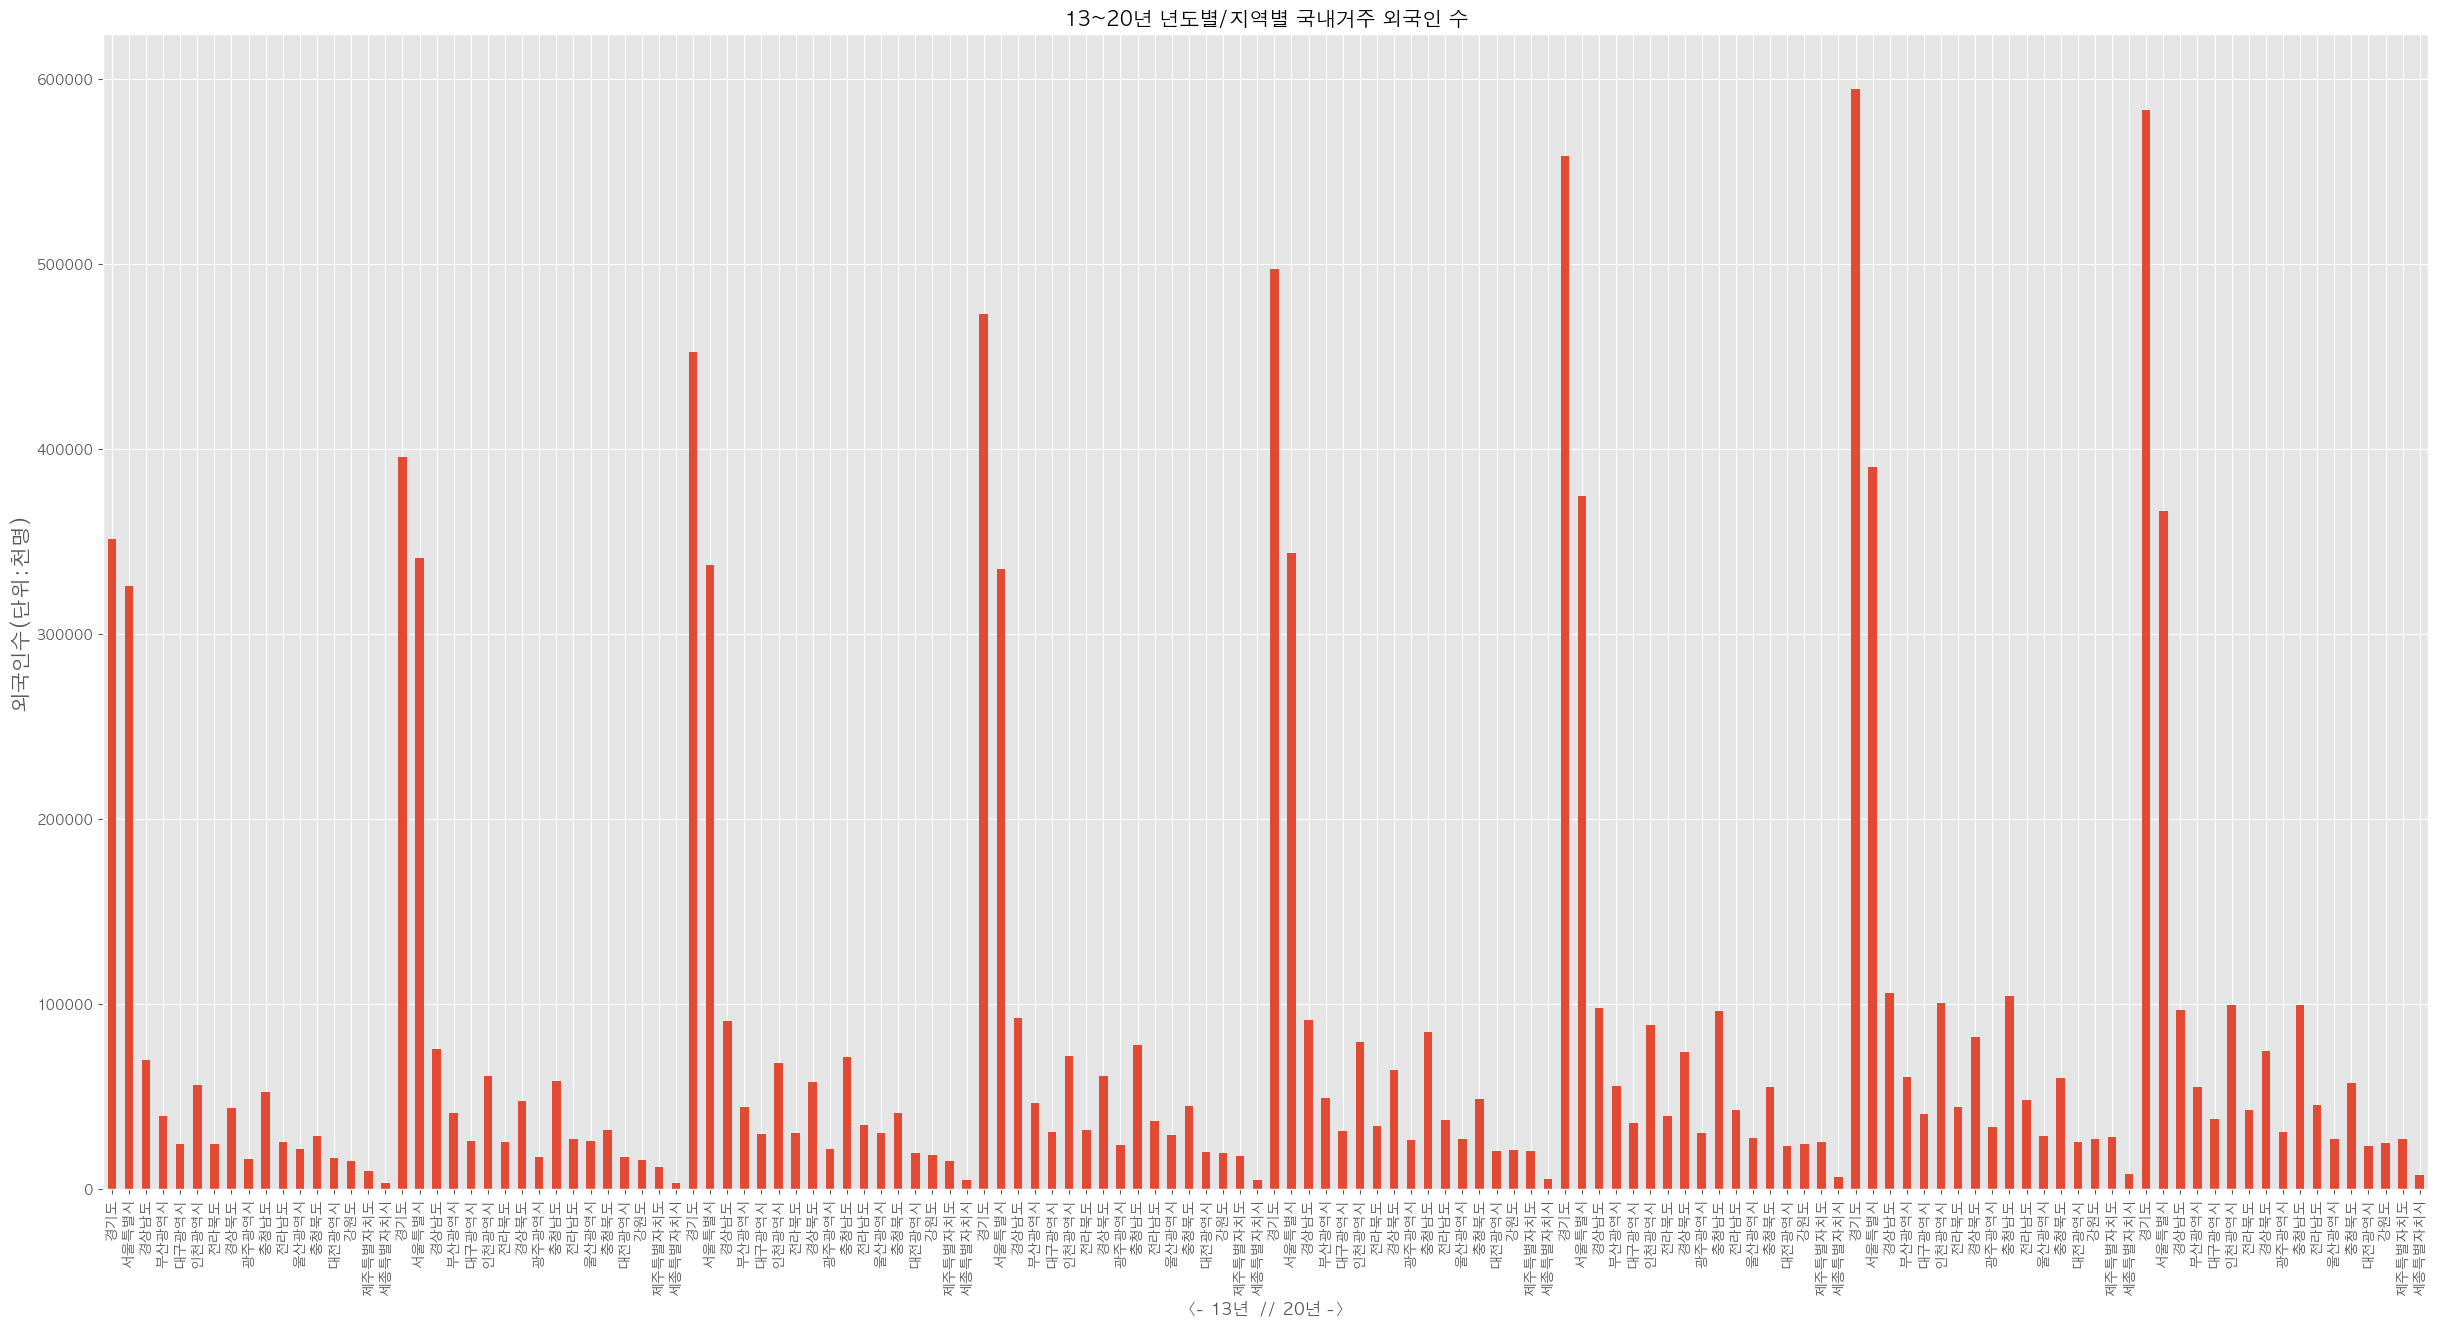

In [52]:
plt.style.use('ggplot')
tonghab3['외국인'].plot(
    kind='bar', 
    figsize=(30,15),
    # color = terrain.colors,
    # xlabel=tonghab3['시도']
    )

# plt.xticks(rotation="horizontal",size=10) # vertical은 90도
plt.ylabel("외국인수(단위:천명)", size=15)
plt.title('13~20년 년도별/지역별 국내거주 외국인 수')
plt.xlabel('<- 13년  // 20년 ->' )

plt.show()

In [ ]:
tonghab4 = pd.read_csv('../../Data/04.통합.csv')
tonghab4.head(3)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,351074
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,325766
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,69628


In [ ]:
tonghab4['외국인비율'] = round(tonghab4['외국인']/tonghab4['총인구']* 100 ,2)
# tonghab4['외국인']/tonghab4['총인구'] * 100

In [ ]:
tonghab4

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인,외국인비율
0,2013,경기도,12234630,1821303,112129,286,739619,49143,248468.3,13718.5,351074,2.87
1,2013,서울특별시,10143645,1620640,84066,395,469392,48097,462443.1,532689.2,325766,3.21
2,2013,경상남도,3333820,423864,29504,65,190166,12612,57288.6,6703.3,69628,2.09
3,2013,부산광역시,3527635,496161,25831,82,160821,13902,77411.6,59554.5,39010,1.11
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,24076,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,57094,3.57
132,2020,대전광역시,1463882,243418,7481,44,79807,6405,39341.3,38725.4,22928,1.57
133,2020,강원도,1542840,217897,7835,32,73478,5554,22831.4,23634.2,24654,1.60
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,26831,3.98


In [ ]:
tonghab4.to_csv("../../Data/04.통합.csv", encoding='utf-8', index=False)

In [ ]:
tonghab4.sort_values(by='외국인비율', ascending=False)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인,외국인비율
111,2019,충청남도,2123709,259584,13228,42,122424,7776,37360.9,36495.5,104018,4.90
128,2020,충청남도,2121029,286386,11950,43,120115,8409,41097.0,38260.0,99166,4.68
94,2018,충청남도,2126282,282221,14380,42,120152,7340,36232.6,27566.9,95838,4.51
102,2019,경기도,13239666,1806296,83198,264,769744,52700,376464.3,25501.3,594795,4.49
119,2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,583462,4.35
...,...,...,...,...,...,...,...,...,...,...,...,...
8,2013,광주광역시,1472910,229288,12729,45,96055,6342,23082.8,18041.6,15901,1.08
21,2014,대구광역시,2493264,365739,19361,85,131765,10744,53214.0,42203.2,25822,1.04
31,2014,강원도,1544442,226284,10662,32,80458,5432,14184.7,15124.3,15462,1.00
4,2013,대구광역시,2501588,363224,19340,86,136309,9981,46578.5,37541.7,24076,0.96


In [ ]:
tonghab4[tonghab4['년도']==2020].sort_values(by='외국인비율', ascending=False)

,년도,시도,총인구,전출인구,출생아수,산부인과의원수,초등학생인원수,도매 및 소매업 신생,예금은행대출금액,예금액,외국인,외국인비율
128,2020,충청남도,2121029,286386,11950,43,120115,8409,41097.0,38260.0,99166,4.68
119,2020,경기도,13427014,1984199,77737,265,761731,63145,419831.8,24939.5,583462,4.35
134,2020,제주특별자치도,674635,94736,3989,23,40575,2856,20182.3,14025.4,26831,3.98
120,2020,서울특별시,9668465,1642977,47445,385,409536,49581,726164.1,898371.8,366454,3.79
131,2020,충청북도,1600837,226441,8607,40,85135,6103,28669.1,27669.5,57094,3.57
124,2020,인천광역시,2942828,460304,16040,60,156928,13214,102078.5,51948.8,99212,3.37
121,2020,경상남도,3340216,419997,16823,59,190849,12160,82937.6,10308.9,96669,2.89
126,2020,경상북도,2639422,334679,12873,53,129079,9471,47189.5,51352.9,74547,2.82
129,2020,전라남도,1851549,248770,9738,18,92405,6948,26806.6,36756.8,45236,2.44
130,2020,울산광역시,1136017,149696,6617,34,67397,3754,30498.2,18231.6,26895,2.37
